# Introduction

1. How does the choice of school play into academic performance?
2. Are there differences in achievement based on gender, location, or student attitudes?
3. Are there differences in achievement based on teacher practices and attitudes?
4. Does there exist inequality in academic achievement?

# Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
df = pd.read_csv('pisa2012.csv', encoding='latin-1')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


# Question 1: Academic performance vs. choice of school

Relevant columns:

- CNT: Country
- IC02Q01: At school - Desktop Computer
- IC02Q02: At school - Portable laptop
- IC02Q03: At school - Tablet computer
- PV1MATH ~ PV5SCIE: Scores in mathematics



In [5]:
df_school = df[['CNT','IC02Q01', 'IC02Q02', 'IC02Q03','PV1MATH', 'PV2MATH']]

In [6]:
df_school['IC02Q02'].sample(10)

187835                        NaN
320837                         No
229495    Yes, but I dont use it
141629                        NaN
406863    Yes, but I dont use it
355103                        NaN
447792          Yes, and I use it
309613          Yes, and I use it
390543                        NaN
147062          Yes, and I use it
Name: IC02Q02, dtype: object

Convert the datatype of Column IC02Q01 to boolean

In [7]:
def convert_bool(v):
    if type(v) is float:
        return np.nan
    elif "Yes" in v:
        return 1
    else: return 0

In [8]:
df_school['desktop'] = df_school.IC02Q01.apply(convert_bool)
df_school['laptop'] = df_school.IC02Q02.apply(convert_bool)
df_school['tablet'] = df_school.IC02Q03.apply(convert_bool)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [9]:
df_school.sample(5)

,CNT,IC02Q01,IC02Q02,IC02Q03,PV1MATH,PV2MATH,desktop,laptop,tablet
229547,Ireland,"Yes, but I dont use it",No,No,481.8585,546.5104,1.0,0.0,0.0
115952,Colombia,NaN,NaN,NaN,294.5241,310.8818,NaN,NaN,NaN
378719,Peru,NaN,NaN,NaN,493.2310,469.0840,NaN,NaN,NaN
136018,Germany,"Yes, and I use it","Yes, but I dont use it","Yes, and I use it",345.3887,339.1572,1.0,1.0,1.0
201914,Greece,"Yes, but I dont use it",No,No,490.8942,492.4521,1.0,0.0,0.0


In [10]:
df_school.drop(columns=['IC02Q01','IC02Q02','IC02Q03'], inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [11]:
# drop rows with NaN
df_school.dropna(inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
df_school['computers'] = df_school.desktop + df_school.laptop + df_school.tablet

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


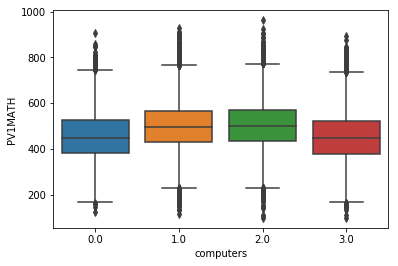

In [13]:
sns.boxplot(x= 'computers', y='PV1MATH', data=df_school)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


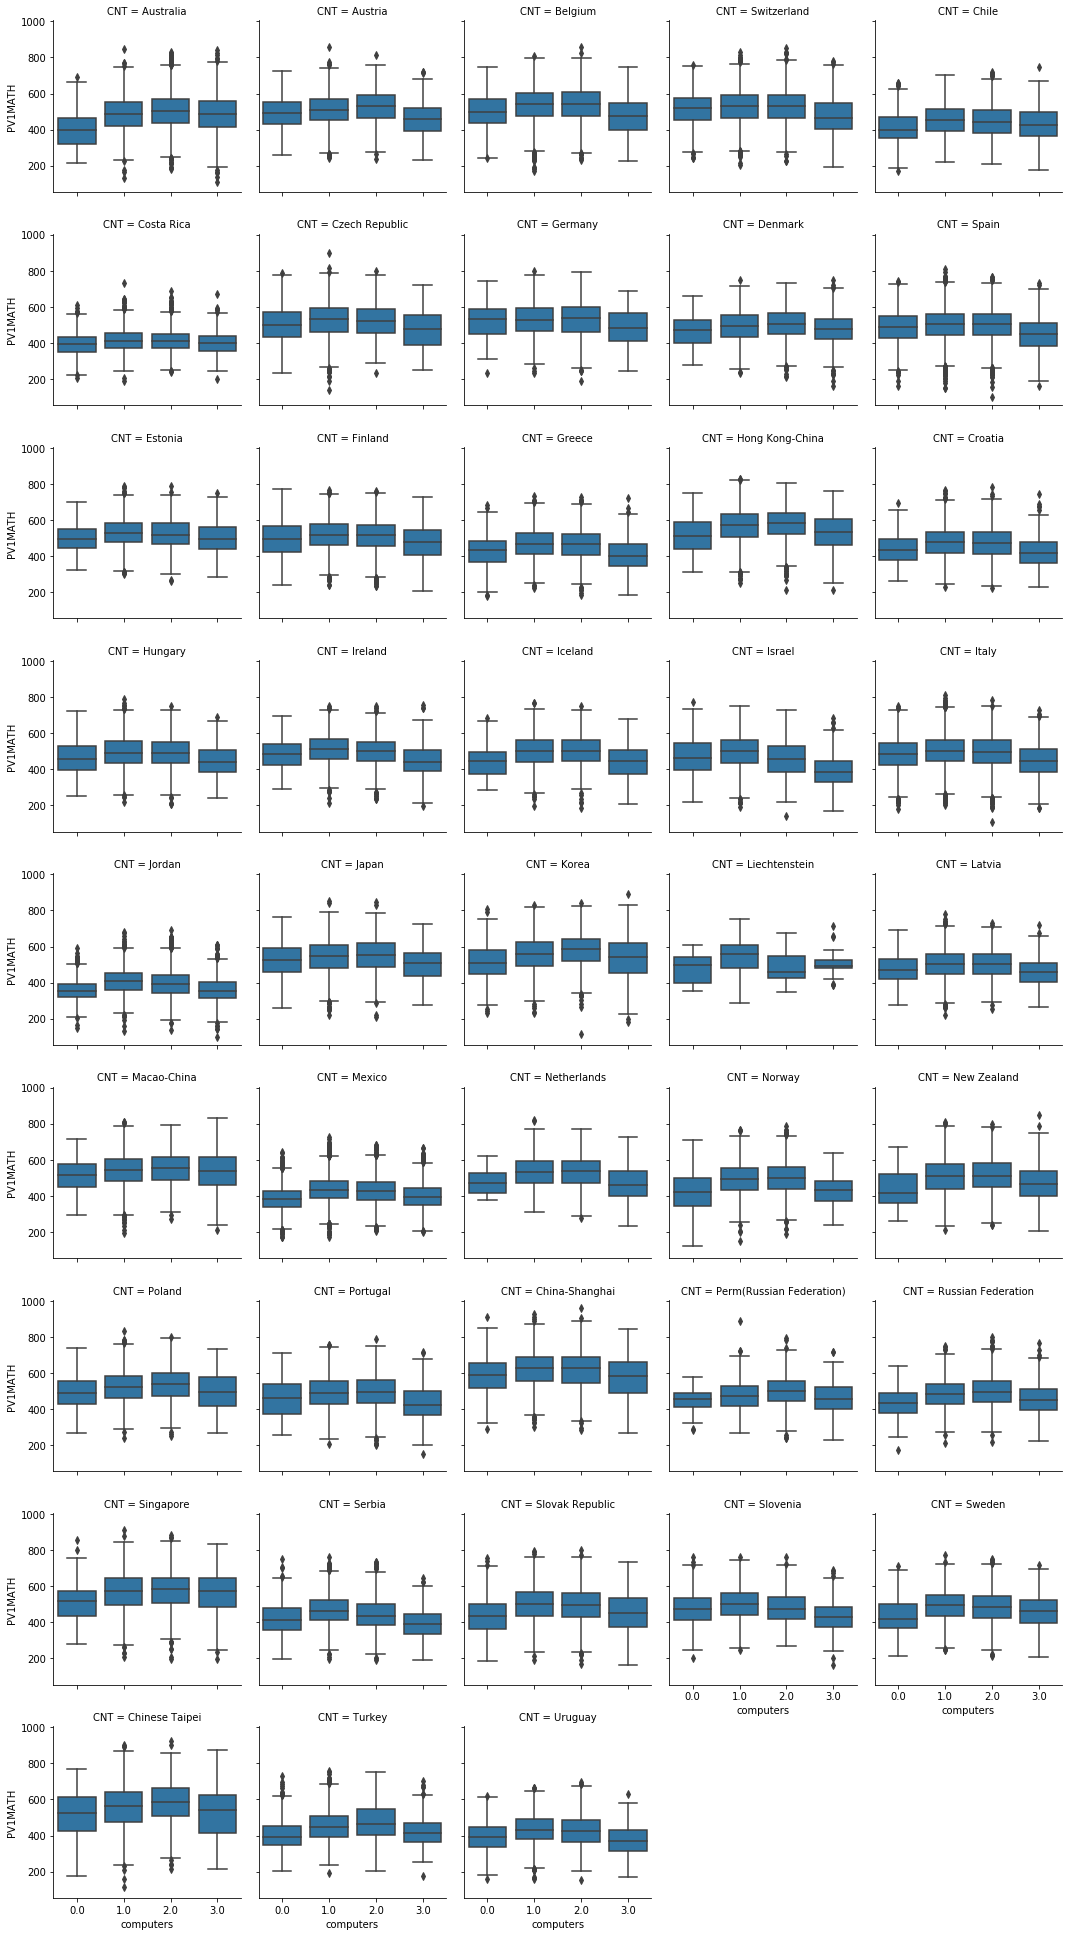

In [14]:
g = sns.FacetGrid(data = df_school, col = 'CNT', col_wrap=5)
g.map(sns.boxplot, 'computers', 'PV1MATH')

# Question 2: Achievement vs. gender, location, or student attitudes

Relevant columns:

- ST04Q01: Gender
- CNT: Country code 3-character
- ST88Q01 ~ ST89Q05: Attitude towards School


## Gender

In [15]:
df_gender = df[['ST04Q01', 'PV1MATH']]

In [16]:
df_gender.isnull().sum()

ST04Q01    0
PV1MATH    0
dtype: int64

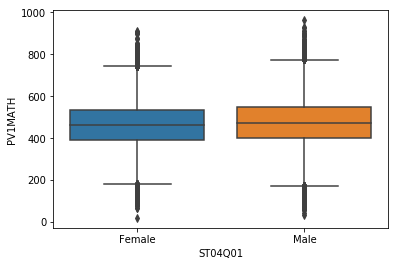

In [17]:
sns.boxplot(x= 'ST04Q01', y='PV1MATH', data=df_gender)

## Location

In [18]:
df_loc = df[['CNT', 'PV1MATH']]

In [19]:
df_loc.isnull().sum()

CNT        0
PV1MATH    0
dtype: int64

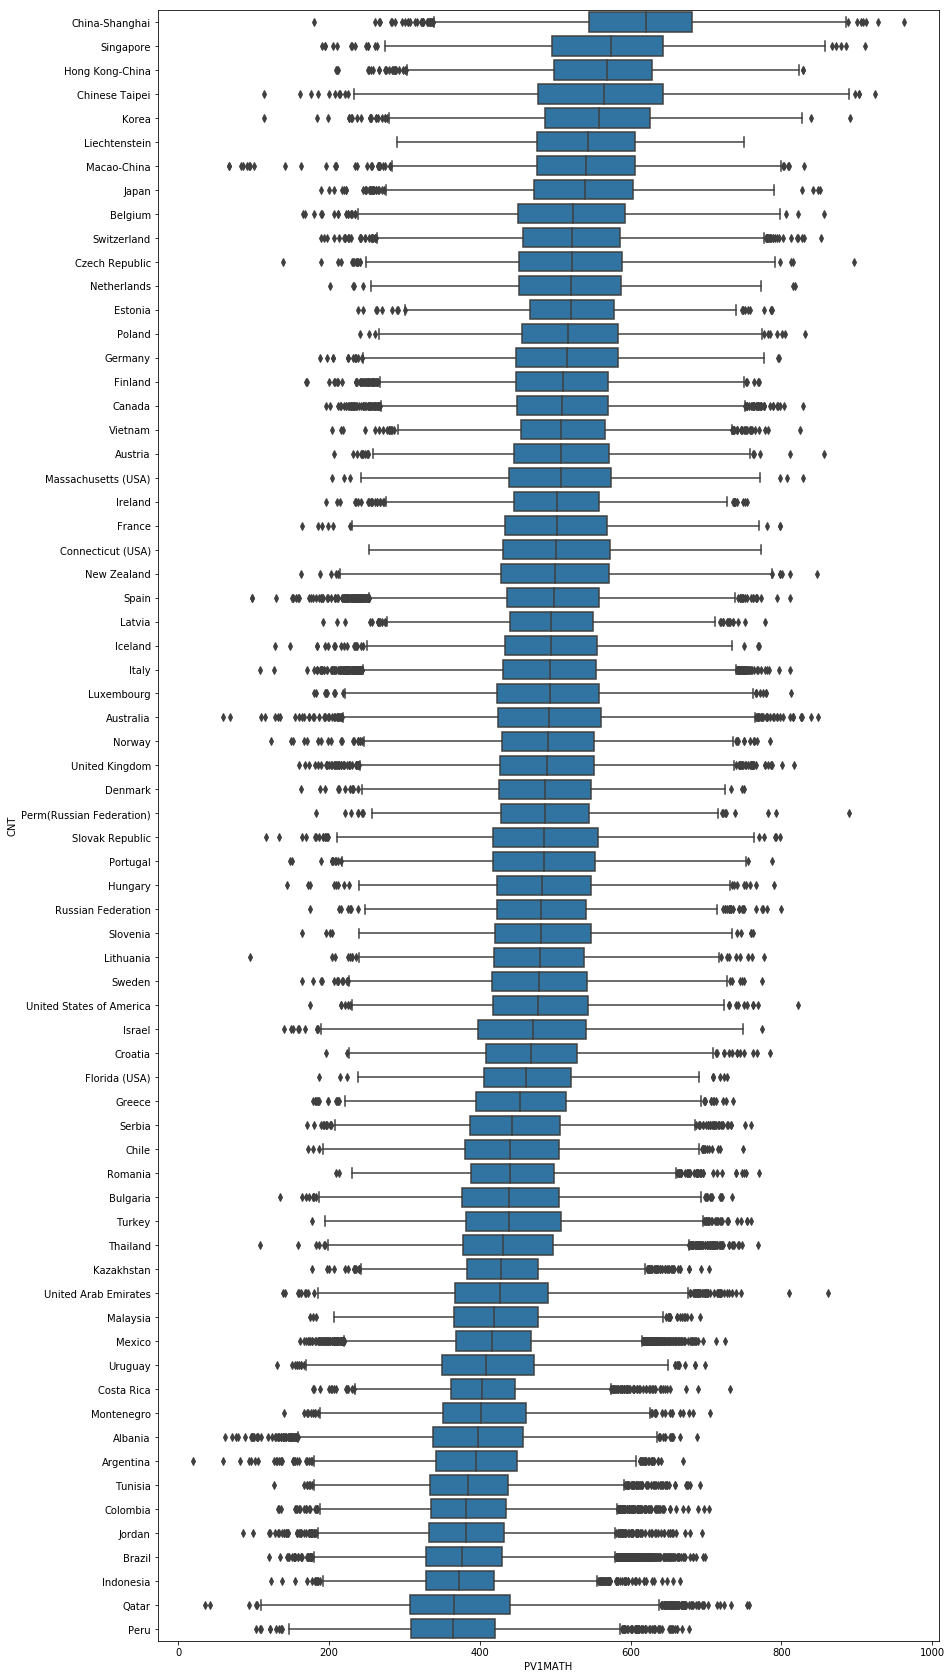

In [20]:
plt.figure(figsize=(14,30))
base_color = sns.color_palette()[0]
my_order = df_loc.groupby('CNT')["PV1MATH"].median().sort_values(ascending=False).index
sns.boxplot(y= 'CNT', x='PV1MATH', data=df_loc, orient="h", color = base_color, order=my_order)

# Attitude

In [21]:
df.ST88Q01.sample(20)

454198             Disagree
142079             Disagree
206985                  NaN
289519    Strongly disagree
10561              Disagree
9599                  Agree
461408                  NaN
348708                  NaN
386666    Strongly disagree
261069             Disagree
432913                  NaN
256033    Strongly disagree
100216                  NaN
40361              Disagree
320456    Strongly disagree
295017    Strongly disagree
418569             Disagree
456245                Agree
163897             Disagree
409010                  NaN
Name: ST88Q01, dtype: object

In [22]:
df_attitude = df[['ST88Q01','ST88Q02','ST88Q03','ST88Q04','ST89Q02','ST89Q03','ST89Q04','ST89Q05','PV1MATH']]

In [23]:
df_attitude.dropna(inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


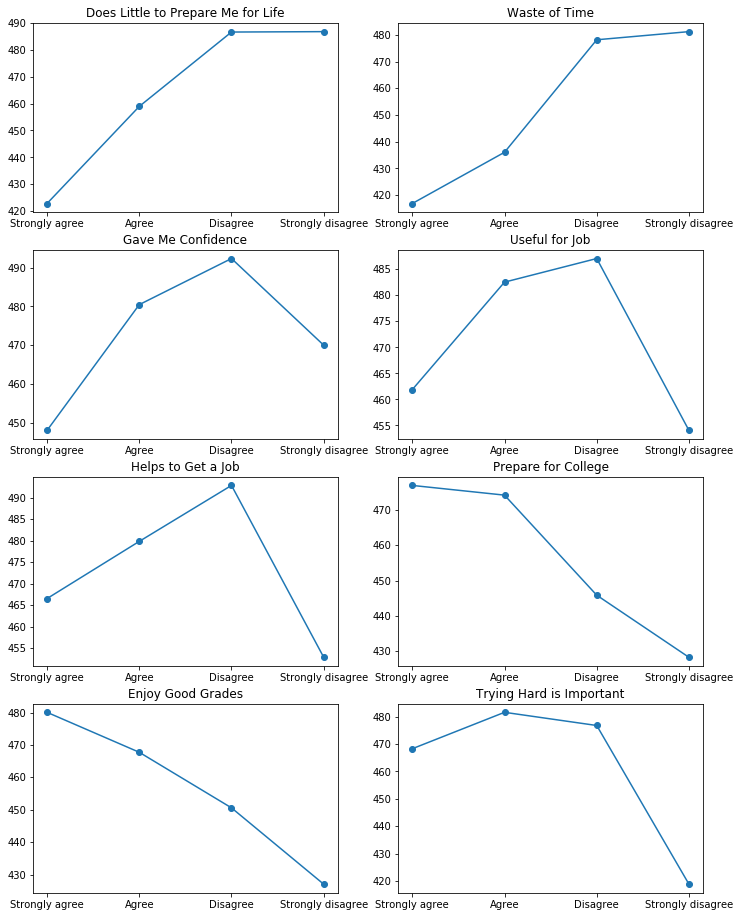

In [24]:
attitudes = ['ST88Q01','ST88Q02','ST88Q03','ST88Q04','ST89Q02','ST89Q03','ST89Q04','ST89Q05']
titles = ['Does Little to Prepare Me for Life', 'Waste of Time', 'Gave Me Confidence', 'Useful for Job',
          'Helps to Get a Job','Prepare for College', 'Enjoy Good Grades', 'Trying Hard is Important']
fig, axes = plt.subplots(4, 2, figsize=(12,16)) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(8):
    plt.sca(axes[i]) # set the current Axes
    att = df_attitude.groupby(attitudes[i]).mean().reindex(index=['Strongly agree', 'Agree','Disagree','Strongly disagree'] )
    plt.plot(att, marker='o')
    plt.title(titles[i])

# Question 3: Achievement vs. teacher practices and attitude

## Teacher practices

Relevant columns:

- ST77Q01~ST77Q06: teacher bahavior
- ST79Q01, ST79Q02, ST79Q06, ST79Q08, ST79Q15: teacher-directed instruction
- ST83Q01~ST83Q04: teacher support
- ST86Q01~ST86Q05: student-teacher relation


In [35]:
df_behavior = df[['ST77Q01','ST77Q02','ST77Q04','ST77Q05','ST77Q06','PV1MATH']]

In [40]:
df_behavior.sample(10)

,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,PV1MATH
114086,Every Lesson,Every Lesson,Every Lesson,Every Lesson,Most Lessons,341.3382
334423,NaN,NaN,NaN,NaN,NaN,467.9935
198190,Every Lesson,Most Lessons,Every Lesson,Every Lesson,Most Lessons,550.3272
424410,NaN,NaN,NaN,NaN,NaN,638.6587
238492,NaN,NaN,NaN,NaN,NaN,532.1779
262449,Most Lessons,Most Lessons,Every Lesson,Most Lessons,Most Lessons,433.3307
426547,NaN,NaN,NaN,NaN,NaN,732.3649
161047,Some Lessons,Most Lessons,Most Lessons,Every Lesson,Never or Hardly Ever,419.2320
347142,NaN,NaN,NaN,NaN,NaN,565.6722
282131,NaN,NaN,NaN,NaN,NaN,601.5033


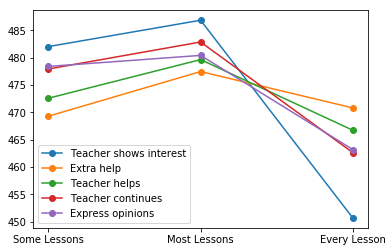

In [44]:
behaviors = ['ST77Q01','ST77Q02','ST77Q04','ST77Q05','ST77Q06']
legends = ['Teacher shows interest', 'Extra help', 'Teacher helps', 'Teacher continues', 'Express opinions']
# fig, axes = plt.subplots(2, 2, figsize=(12,16)) # grid of 3x4 subplots
# axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(5):
#     plt.sca(axes[i]) # set the current Axes
    beh = df_behavior.groupby(behaviors[i]).mean().reindex(index=['Some Lessons', 'Most Lessons','Every Lesson'] )
    plt.plot(beh, marker='o', label=legends[i])
    plt.legend()
#     plt.title(titles[i])

In [25]:
df_support = df[['ST83Q01', 'ST83Q02','ST83Q03','ST83Q04','PV1MATH']]

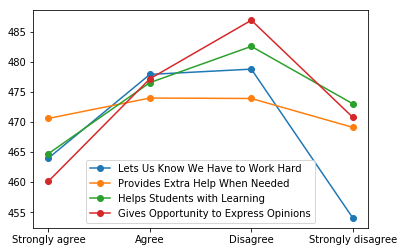

In [45]:
supports = ['ST83Q01', 'ST83Q02','ST83Q03','ST83Q04']
titles = ['Lets Us Know We Have to Work Hard', 'Provides Extra Help When Needed', 'Helps Students with Learning', 'Gives Opportunity to Express Opinions']
# fig, axes = plt.subplots(2, 2, figsize=(12,16)) # grid of 3x4 subplots
# axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(4):
#     plt.sca(axes[i]) # set the current Axes
    sup = df_support.groupby(supports[i]).mean().reindex(index=['Strongly agree', 'Agree','Disagree','Strongly disagree'] )
    plt.plot(sup, marker='o', label=titles[i])
    plt.legend()
#     plt.title(titles[i])

In [27]:
df_relation = df[['ST86Q01', 'ST86Q02','ST86Q03','ST86Q04','ST86Q05','PV1MATH']]

In [28]:
# relations = ['ST86Q01', 'ST86Q02','ST86Q03','ST86Q04','ST86Q05','PV1MATH']
# titles = ['Get Along with Teachers', 'Teachers Are Interested', 'Teachers Listen to Students', 'Teachers Help Students', 'Teachers Treat Students Fair']
# fig, axes = plt.subplots(3, 2, figsize=(12,16)) # grid of 3x4 subplots
# axes = axes.flatten() # reshape from 3x4 array into 12-element vector
# for i in range(5):
#     plt.sca(axes[i]) # set the current Axes
#     sup = df_relation.groupby(relations[i]).mean().reindex(index=['Strongly agree', 'Agree','Disagree','Strongly disagree'] )
#     plt.plot(sup, marker='o')
#     plt.title(titles[i])

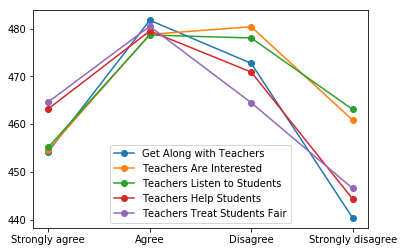

In [30]:
relations = ['ST86Q01', 'ST86Q02','ST86Q03','ST86Q04','ST86Q05','PV1MATH']
legends = ['Get Along with Teachers', 'Teachers Are Interested', 'Teachers Listen to Students', 'Teachers Help Students', 'Teachers Treat Students Fair']
# fig, axes = plt.subplots(3, 2, figsize=(12,16)) # grid of 3x4 subplots
# axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(5):
#     plt.sca(axes[i]) # set the current Axes
    sup = df_relation.groupby(relations[i]).mean().reindex(index=['Strongly agree', 'Agree','Disagree','Strongly disagree'] )
    plt.plot(sup, marker='o', label=legends[i])
    plt.legend()

## Teacher attitude

Relevant columns:

- 